Graph modularity: 0.7954292393791783
CNM modularity: 0.773149160433466
CNM time: 1.6612520217895508 seconds
CNM NMI: 0.9112800065989558  ,CNM ARI: 0.7874067106522834
Leiden modularity: 0.7954292393791786
Leiden time: 0.02601170539855957 seconds
leiden NMI: 1.0  ,leiden ARI: 1.0
Louvain modularity: 0.7954292393791785
Louvain time: 0.00599980354309082 seconds
louvain NMI: 1.0  ,louvain ARI: 1.0
FG modularity: 0.7731491604334664
FG time: 0.19027113914489746 seconds
fastgreedy NMI: 0.9112800065989558  ,fastgreedy ARI: 0.7874067106522834
eigenvector modularity: 0.5444736590416754
eigenvector time: 0.21805596351623535 seconds
eigenvector NMI: 0.7142999905664417  ,eigenvector ARI: 0.5381179541339118


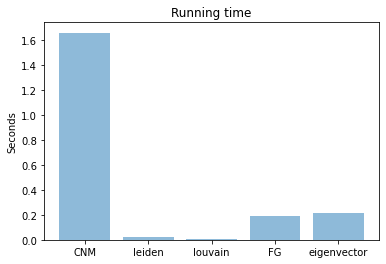

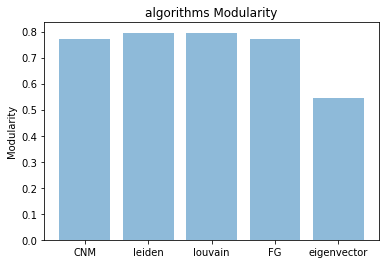

In [273]:
#All
import matplotlib.pyplot as plt
import leidenalg
import networkx
import igraph
import time
import community
import louvain
import numpy as np

n = 1000
tau1 = 2
tau2 = 1.5
mu = 0.1
G = networkx.generators.community.LFR_benchmark_graph(n, tau1, tau2, mu, average_degree=15, min_degree=None, max_degree=50,
                                min_community=20, max_community=80, tol=1e-07, max_iters=500, seed=None);
G2 = igraph.Graph.from_networkx(G)
communities = {frozenset(G.nodes[v]["community"]) for v in G}
Gm = networkx.algorithms.community.modularity(G,communities)
print("Graph modularity:",Gm)
c=list(communities)
L1= [x for x in range(n)]
for j in range(len(communities)):
 for i in range(len(c[j])):
  f=list(c[j])
  L1[f[i]]=j


#CNM
start1 = time.time()
CNMp=networkx.algorithms.community.greedy_modularity_communities(G)
end1 = time.time()
CNMm=networkx.algorithms.community.modularity(G, CNMp)
print("CNM modularity:",CNMm)
CNM_time = end1 - start1
print("CNM time:", CNM_time, "seconds")
c=list(CNMp)
L= [x for x in range(n)]
for j in range(len(CNMp)):
 for i in range(len(c[j])):
  f=list(c[j])
  L[f[i]]=j


NMI1=igraph.compare_communities(L,L1,method="nmi")
ARI1=igraph.compare_communities(L,L1,method="ari")
print("CNM NMI:", NMI1, " ,CNM ARI:", ARI1)






#leiden
start2 = time.time()
leidenp = leidenalg.find_partition(G2, leidenalg.ModularityVertexPartition);
end2 = time.time()
leidenm =G2.modularity(leidenp)
print("Leiden modularity:",leidenm)
Leiden_time = end2 - start2
print("Leiden time:", Leiden_time, "seconds")
NMI2=igraph.compare_communities(leidenp.membership,L1,method="nmi")
ARI2=igraph.compare_communities(leidenp.membership,L1,method="ari")
print("leiden NMI:", NMI2, " ,leiden ARI:", ARI2)


#louvain
start3 = time.time()
louvainp = G2.community_multilevel();
end3 = time.time()
louvainm = G2.modularity(louvainp)
print("Louvain modularity:",louvainm)
Louvain_time = end3 - start3
print("Louvain time:", Louvain_time, "seconds")
NMI3=igraph.compare_communities(louvainp.membership,L1,method="nmi")
ARI3=igraph.compare_communities(louvainp.membership,L1,method="ari")
print("louvain NMI:", NMI3, " ,louvain ARI:", ARI3)


##fastgreedy
start4 = time.time()
com=G2.community_fastgreedy()
FGp=com.as_clustering()
end4 = time.time()
FGm = G2.modularity(FGp)
print("FG modularity:",FGm)
FG_time = end4 - start4
print("FG time:",FG_time, "seconds")
NMI4=igraph.compare_communities(FGp.membership,L1,method="nmi")
ARI4=igraph.compare_communities(FGp.membership,L1,method="ari")
print("fastgreedy NMI:", NMI4, " ,fastgreedy ARI:", ARI4)

#leading_eigenvector
start5 = time.time()
eigenvectorp = G2.community_leading_eigenvector()
end5 = time.time()
eigenvectorm =G2.modularity(eigenvectorp)
print("eigenvector modularity:",eigenvectorm)
eigenvector_time = end5 - start5
print("eigenvector time:",eigenvector_time, "seconds")
NMI5=igraph.compare_communities(eigenvectorp.membership,L1,method="nmi")
ARI5=igraph.compare_communities(eigenvectorp.membership,L1,method="ari")
print("eigenvector NMI:", NMI5, " ,eigenvector ARI:", ARI5)


algorithm=("CNM","leiden","louvain","FG","eigenvector")
Processing_time=( CNM_time,Leiden_time,Louvain_time,FG_time,eigenvector_time)
Modularity=(CNMm,leidenm,louvainm,FGm,eigenvectorm)

y_pos = np.arange(len(algorithm))
plt.bar(y_pos,Processing_time, align='center', alpha=0.5)
plt.xticks(y_pos, algorithm)
plt.ylabel('Seconds')
plt.title('Running time')
plt.show()

plt.bar(y_pos,Modularity, align='center', alpha=0.5)
plt.xticks(y_pos, algorithm)
plt.ylabel('Modularity')
plt.title('algorithms Modularity')
plt.show()

In [269]:
#CNM
import networkx
import igraph
import numpy as np
n = 100
tau1 = 3
tau2 = 1.5
mu = 0
G = networkx.generators.community.LFR_benchmark_graph(n, tau1, tau2, mu, average_degree=None, min_degree=5, max_degree=100, min_community=100, max_community=100, tol=1e-07, max_iters=300, seed=None);
#sorted(c[0])
CNMp=networkx.algorithms.community.greedy_modularity_communities(G)
CNMm=networkx.algorithms.community.modularity(G, networkx.algorithms.community.greedy_modularity_communities(G))
print(networkx.algorithms.community.greedy_modularity_communities(G))
c=list(CNMp)
L= [x for x in range(n)]
for j in range(len(CNMp)):
 for i in range(len(c[j])):
  f=list(c[j])
  L[f[i]]=j
print(L)



[frozenset({0, 3, 5, 7, 14, 16, 18, 37, 38, 39, 40, 43, 48, 51, 59, 60, 64, 75, 76, 79, 85, 89, 90, 91}), frozenset({2, 13, 17, 20, 21, 22, 29, 33, 35, 41, 42, 46, 49, 57, 61, 67, 71, 72, 73, 74, 82, 84, 86}), frozenset({6, 11, 19, 23, 27, 28, 31, 47, 52, 55, 56, 62, 69, 70, 80, 83, 88, 93, 97, 98}), frozenset({32, 1, 66, 68, 12, 44, 78, 15, 81, 53, 54, 24, 25, 26, 92, 95}), frozenset({65, 34, 45, 77, 50, 87, 58, 30}), frozenset({4, 36, 8, 10, 94}), frozenset({96, 9, 99, 63})]
[0, 3, 1, 0, 5, 0, 2, 0, 5, 6, 5, 2, 3, 1, 0, 3, 0, 1, 0, 2, 1, 1, 1, 2, 3, 3, 3, 2, 2, 1, 4, 2, 3, 1, 4, 1, 5, 0, 0, 0, 0, 1, 1, 0, 3, 4, 1, 2, 0, 1, 4, 0, 2, 3, 3, 2, 2, 1, 4, 0, 0, 1, 2, 6, 0, 4, 3, 1, 3, 2, 2, 1, 1, 1, 1, 0, 0, 4, 3, 0, 2, 3, 1, 2, 1, 0, 1, 4, 2, 0, 0, 0, 3, 2, 5, 3, 6, 2, 2, 6]


In [178]:
#Dlib
import networkx
import igraph
from cdlib import algorithms
n = 100
tau1 = 3
tau2 = 1.5
mu = 0
G = networkx.generators.community.LFR_benchmark_graph(n, tau1, tau2, mu, average_degree=None, min_degree=5, max_degree=100, min_community=100, max_community=100, tol=1e-07, max_iters=300, seed=None);
G2 = igraph.Graph.from_networkx(G)
eigenvectorp = G2.community_leading_eigenvector()
e1= networkx.algorithms.community.modularity(G,eigenvectorp)
e2=G2.modularity(eigenvectorp)
print(e1)
print(e2)

0.17084973144229101
0.17084973144229104


In [208]:
#LFR
import matplotlib.pyplot as plt
import leidenalg
import networkx
import igraph
import time
import community
import louvain
import numpy as np

n = 100
tau1 = 2
tau2 = 1.5
mu = 0.1
G = networkx.generators.community.LFR_benchmark_graph(n, tau1, tau2, mu, average_degree=5, min_degree=None, max_degree=20,
                                min_community=10, max_community=30, tol=1e-07, max_iters=500, seed=None);
communities = {frozenset(G.nodes[v]["community"]) for v in G}
member={frozenset([communities])for v in G}
print(communities)
print(member)


TypeError: unhashable type: 'set'

In [201]:
#louvain
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import community
import networkx 
import igraph 
import louvain
n = 100
tau1 = 3
tau2 = 1.5
mu = 0
G = networkx.generators.community.LFR_benchmark_graph(n, tau1, tau2, mu, average_degree=None, min_degree=5, max_degree=100, min_community=100, max_community=100, tol=1e-07, max_iters=300, seed=None);
G2 = igraph.Graph.from_networkx(G)
Louvainp1 = louvain.find_partition(G2, louvain.ModularityVertexPartition);
Louvainp2 = G2.community_multilevel();
#Louvainp = community.best_partition(G)
#louvainm = networkx.algorithms.community.modularity(G,louvainp)
#print(Louvainp)
print(Louvainp1)
print(Louvainp1.membership)

Clustering with 100 elements and 6 clusters
[0] 1, 3, 6, 9, 10, 11, 18, 21, 24, 27, 30, 32, 40, 41, 42, 57, 78, 80, 86,
    91, 92
[1] 2, 5, 14, 15, 16, 36, 39, 47, 52, 58, 62, 64, 67, 71, 75, 76, 85, 87, 90
[2] 12, 23, 26, 31, 33, 34, 35, 38, 43, 46, 56, 61, 65, 66, 81, 83, 93, 97, 99
[3] 7, 8, 19, 20, 45, 50, 51, 53, 63, 69, 70, 73, 74, 77, 88, 89, 94
[4] 4, 13, 17, 22, 28, 29, 37, 44, 49, 54, 55, 59, 60, 95, 96
[5] 0, 25, 48, 68, 72, 79, 82, 84, 98
[5, 0, 1, 0, 4, 1, 0, 3, 3, 0, 0, 0, 2, 4, 1, 1, 1, 4, 0, 3, 3, 0, 4, 2, 0, 5, 2, 0, 4, 4, 0, 2, 0, 2, 2, 2, 1, 4, 2, 1, 0, 0, 0, 2, 4, 3, 2, 1, 5, 4, 3, 3, 1, 3, 4, 4, 2, 0, 1, 4, 4, 2, 1, 3, 1, 2, 2, 1, 5, 3, 3, 1, 5, 3, 3, 1, 1, 3, 0, 5, 0, 2, 5, 2, 5, 1, 0, 1, 3, 3, 1, 0, 0, 2, 3, 4, 4, 2, 5, 2]


In [186]:
#leidenalg
import leidenalg
import networkx 
import igraph 
n = 50
tau1 = 3
tau2 = 1.5
mu = 0
G = networkx.generators.community.LFR_benchmark_graph(n, tau1, tau2, mu, average_degree=None, min_degree=5, max_degree=50, min_community=50, max_community=50, tol=1e-07, max_iters=300, seed=None);
G2 = igraph.Graph.from_networkx(G)
leiden1 = leidenalg.find_partition(G2, leidenalg.ModularityVertexPartition);
leiden2=G2.community_multilevel()
print(leiden1)
print(leiden2)

Clustering with 50 elements and 5 clusters
[0] 0, 3, 5, 12, 15, 16, 23, 24, 29, 30, 33, 36, 38, 40, 42, 44
[1] 1, 2, 7, 8, 11, 13, 17, 19, 20, 26, 31, 43
[2] 22, 25, 27, 28, 32, 35, 41, 48, 49
[3] 9, 10, 14, 34, 37, 39, 46
[4] 4, 6, 18, 21, 45, 47
Clustering with 50 elements and 6 clusters
[0] 0, 2, 12, 23, 28, 29, 37
[1] 1, 7, 8, 13, 17, 19, 20, 26, 31, 43
[2] 3, 4, 5, 6, 9, 16, 18, 21, 45
[3] 10, 24, 33, 34, 36, 40, 42, 44
[4] 11, 15, 32, 39, 41, 46, 47, 48, 49
[5] 14, 22, 25, 27, 30, 35, 38


In [190]:
#fastgreedy
import leidenalg
import networkx 
import igraph 
n = 50
tau1 = 3
tau2 = 1.5
mu = 0
G = networkx.generators.community.LFR_benchmark_graph(n, tau1, tau2, mu, average_degree=None, min_degree=5, max_degree=50, min_community=50, max_community=50, tol=1e-07, max_iters=300, seed=None);
G2 = igraph.Graph.from_networkx(G)
com=G2.community_fastgreedy()
FGp=com.as_clustering()
print(FGp)

Clustering with 50 elements and 5 clusters
[0] 0, 3, 6, 7, 23, 25, 29, 41
[1] 1, 2, 8, 9, 10, 13, 19, 21, 24, 30, 32, 43, 45
[2] 4, 11, 14, 16, 22, 28, 31, 33, 39, 42, 46
[3] 5, 12, 18, 20, 26, 27, 36, 40, 49
[4] 15, 17, 34, 35, 37, 38, 44, 47, 48


In [41]:
%% https://towardsdatascience.com/community-detection-algorithms-9bd8951e7dae
https://snap.stanford.edu/snappy/doc/reference/CommunityCNM.html
 https://github.com/zhiyzuo/python-modularity-maximization/tree/master/modularity_maximization
    

UsageError: Cell magic `%%` not found.


In [5]:
import snap

UGraph = snap.GenRndGnm(snap.TUNGraph, 100, 1000)
modularity, CmtyV = UGraph.CommunityCNM()
for Cmty in CmtyV:
    print("Community: ")
    for NI in Cmty:
        print(NI)
print("The modularity of the network is %f" % modularity)

ModuleNotFoundError: No module named 'snap'

In [6]:

from modularity_maximization.community_newman import partition
from modularity_maximization.utils import get_modularity

ModuleNotFoundError: No module named 'modularity_maximization'

In [65]:
import community as community_louvain
import networkx as nx
G = nx.erdos_renyi_graph(100, 0.01)
#partition = community_louvain.best_partition(G)



NetworkXError: random_state_index is incorrect